In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

Part 1:
Reading in the data

In [3]:

folder_path = '../TECH2-GROUP-TERM-PAPER/data' 

# List all CSV files in the folder
all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Exclude the CPI file 
files_to_read = [f for f in all_files if 'CPI' not in f.upper()]

# Read all SCE files into a dictionary of DataFrames
dfs = []
for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    dfa = pd.read_csv(file_path, sep = ';')
    #data_frames[file] = df
    dfs.append(dfa)
df = pd.concat(dfs, ignore_index=True)
df



,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q3,num_lit_q3_correct,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct
0,70024705,201404,2014-04-03,1.0,0.0,3.0,23.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70024720,201404,2014-04-02,0.5,0.0,4.0,65.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,70024744,201404,2014-04-02,0.6,0.0,4.0,52.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70024764,201404,2014-04-08,0.4,1.0,4.0,46.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,70024781,201404,2014-04-10,0.8,1.0,3.0,61.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176096,75023169,202409,2024-09-19,2.5,1.0,1.0,23.0,0.0,1.0,0.0,...,2.0,0.0,20.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0
176097,75023181,202409,2024-09-07,1.1,1.0,3.0,53.0,1.0,1.0,1.0,...,10.0,1.0,1000.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0
176098,75023187,202409,2024-09-19,0.8,0.0,4.0,51.0,0.0,1.0,0.0,...,100.0,0.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176099,75023188,202409,2024-09-03,0.7,1.0,4.0,53.0,0.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0


1.2

In [5]:
print(f'number of uniqe induviduals:', df['userid'].nunique())
print(f'number of observations:', len(df))
print(f'number of survey waves:',len(df['wid'].unique()))
print(f'The first date:', df['date'].min().date())
print(f'The last date:', df['date'].max().date()) 

number of uniqe induviduals: 23369
number of observations: 176101
number of survey waves: 139


AttributeError: 'str' object has no attribute 'date'

Part 2

2.1

In [ ]:

# creates a list of the seven question-collumns 
coll = [f'num_lit_q{n}' for n in (1,2,3,5,6,8,9)]

# transform all these collumns so that the users first answer (on the first servey) are representative for the questions later on
df[coll] = df.groupby('userid')[coll].transform('first')

2.2

In [ ]:
# create lists of demographic information and the expectation-questions
demog=['age', 'female', 'educ']
exp_q=['inflation', 'house_price_change', 'prob_stocks_up']

In [ ]:
# drop missing values for the collumns in the demog-, exp_q-, and coll- variables using the .dropna() function
# conts the number of observations dropped along the prosess
a=len(df)

df=df.dropna(subset=demog)

b=len(df)
print(f'Number of observations dropped when removing non-values for demographic variables (gender, education, age): {a-b}')

df=df.dropna(subset=exp_q)

c=len(df)
print(f'Number of observations dropped when removing non-values for expectation questions (inflation, housing price change, stock market): {b-c}')

df=df.dropna(subset=coll)

d=len(df)
print(f'Number of observations dropped when removing non-values for the seven questions: {c-d}')

print(f'Remaining observations:{len(df)}')
df


Number of observations dropped when removing non-values for demographic variables (gender, education, age): 868
Number of observations dropped when removing non-values for expectation questions (inflation, housing price change, stock market): 1683
Number of observations dropped when removing non-values for the seven questions: 35974
Remaining observations:137576


,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q3,num_lit_q3_correct,num_lit_q5,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct
2348,70057317,201504,2015-04-10,0.5,0.0,4.0,70.0,0.0,0.0,1.0,...,10.0,1.0,10.0,0.0,5.0,1.0,3.0,1.0,2.0,1.0
2349,70057321,201504,2015-04-05,0.5,1.0,4.0,72.0,0.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
2354,70057352,201504,2015-04-11,0.8,0.0,4.0,38.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
2355,70057367,201504,2015-04-15,0.6,0.0,4.0,65.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
2356,70057373,201504,2015-04-10,0.8,0.0,4.0,51.0,0.0,0.0,1.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176096,75023169,202409,2024-09-19,2.5,1.0,1.0,23.0,0.0,1.0,0.0,...,2.0,0.0,20.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0
176097,75023181,202409,2024-09-07,1.1,1.0,3.0,53.0,1.0,1.0,1.0,...,10.0,1.0,1000.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0
176098,75023187,202409,2024-09-19,0.8,0.0,4.0,51.0,0.0,1.0,0.0,...,100.0,0.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0
176099,75023188,202409,2024-09-03,0.7,1.0,4.0,53.0,0.0,0.0,0.0,...,10.0,1.0,100.0,1.0,5.0,1.0,3.0,1.0,2.0,1.0


2.3

In [ ]:
# use the quantile-function to filter out implausibly small or large values to the inflation-, housing-price-change-, and prob-stocks up- values
# calculate the number of values dropped along the prosess

lower_i= df['inflation'].quantile(0.001)
higher_i= df['inflation'].quantile(0.999)

lower_h= df['house_price_change'].quantile(0.001)
higher_h= df['house_price_change'].quantile(0.999)

lower_s= df['prob_stocks_up'].quantile(0.001)
higher_s= df['prob_stocks_up'].quantile(0.999)

a=len(df)
print(f'org observations {a}')

df= df.query(f'inflation > {lower_i} & inflation <{higher_i}')

b=len(df)
print(f'observations dropped w inflation: {a-b}')

df= df.query(f'house_price_change >{lower_h} & house_price_change < {higher_h}')

c=len(df)
print(f'observartions with house_price_change: {b-c}')

df= df.query(f'prob_stocks_up > {lower_s} & prob_stocks_up <{higher_s}')

d=len(df)
print(f'observations dropped when filtering stock guess {c-d}')

print(f'remaining observations {len(df)}, in total {a-len(df)} observations got filtered out') 
# calculate remaining observations, and how many observations that were dropped in total (in part 2.3)


org observations 137576
observations dropped w inflation: 434
observartions with house_price_change: 282
observations dropped when filtering stock guess 2462
remaining observations 134398, in total 3178 observations got filtered out


2.4

In [ ]:
# make a new collumn called college, whith an indicator (1 or 0), dependent on the education level
#education level at 4 equals 1, while any other education leves equal 0
df['college'] = (df['educ']>=4).astype(int)


2.5

In [ ]:
# created a list, coll2, similar to the former defined 'coll', just that this is about the collumn with the correct answers
coll2 = [f'num_lit_q{n}_correct' for n in (1,2,3,5,6,8,9)]

#creates a new collumn that shows percantage accuracy of the seven question asked
df['correct']=df[coll2].mean(axis=1)*100 # multiply with 100 to find the per cent

# calculate how many percent was 100% correct, which was 4,67% of the participents
(len(df.query('correct== 100'))/len(df['correct']))*100


4.673432640366673

In [ ]:
# create a variable for the median score of the participants
median_score= df['correct'].median()

# create a new collumn with 1 or 0 indicator. 1 if the participant has higher score than the median, and 0 if its below.
df['num_lit_high']= (df['correct'] > median_score).astype(int)

In [ ]:
# printing the df, to visualize the changes, this can be removed if desiered, as it is not directly linked to the task
df 


,userid,wid,date,weight,female,educ,age,hispanic,black,couple,...,num_lit_q5_correct,num_lit_q6,num_lit_q6_correct,num_lit_q8,num_lit_q8_correct,num_lit_q9,num_lit_q9_correct,college,correct,num_lit_high
2348,70057317,201504,2015-04-10,0.5,0.0,4.0,70.0,0.0,0.0,1.0,...,0.0,5.0,1.0,3.0,1.0,2.0,1.0,1,85.714286,0
2349,70057321,201504,2015-04-05,0.5,1.0,4.0,72.0,0.0,0.0,0.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,100.000000,1
2354,70057352,201504,2015-04-11,0.8,0.0,4.0,38.0,0.0,0.0,1.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,100.000000,1
2355,70057367,201504,2015-04-15,0.6,0.0,4.0,65.0,0.0,0.0,1.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,100.000000,1
2356,70057373,201504,2015-04-10,0.8,0.0,4.0,51.0,0.0,0.0,1.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,100.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176095,75023161,202409,2024-09-19,0.6,1.0,4.0,45.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,1.0,2.0,1.0,1,85.714286,0
176096,75023169,202409,2024-09-19,2.5,1.0,1.0,23.0,0.0,1.0,0.0,...,0.0,1.0,0.0,2.0,0.0,2.0,1.0,0,28.571429,0
176097,75023181,202409,2024-09-07,1.1,1.0,3.0,53.0,1.0,1.0,1.0,...,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0,28.571429,0
176099,75023188,202409,2024-09-03,0.7,1.0,4.0,53.0,0.0,0.0,0.0,...,1.0,5.0,1.0,3.0,1.0,2.0,1.0,1,85.714286,0


2.6

In [ ]:
print(f'number of uniqe induviduals:', df['userid'].nunique())
print(f'number of observations:', len(df))
print(f'number of suvey waves:',len(df['wid'].unique()))
print(f'The first date:', df['date'].min().date())
print(f'The last date:', df['date'].max().date()) 

number of uniqe induviduals: 17608
number of observations: 134398
number of suvey waves: 117
The first date: 2015-04-02
The last date: 2024-12-31


Part 3: Average expectations by group 

In this part we use the data to investigate how average expecations differ by gender, level of education, and numeracy. 

In [ ]:
# lists
variables = ['inflation', 'house_price_change', 'prob_stocks_up']
genders = ["Male", 'Female']
genderint = [0.0, 1.0]
figures = ['Inflation', 'House price change', 'Prob. Stocks up']
education = ['Not College Educated', 'College Educated']
numeracy_rate = ['High Numeracy', 'Low Numeracy']
colors = ['red', 'blue']
calc_groups = ['df_gender', 'df_college', 'df_numeracy']
falseind = ['Male', 'Not college educated', 'Low numeracy rate']
trueind = ['Female', 'College educated', 'High numeracy rate']

In [ ]:
# 1. average for each expectations variable


# Create a function to calculate and print the average variables 

def df_calculation(variable, falseind, trueind, calc_group):
    variable_neat = variable.replace('_', ' ').upper()
    variable_average = round(calc_group[variable].mean(),1)
    variable_average = variable_average.rename({0.0: f'{falseind}', 1.0: f'{trueind}'})
    variabledc = variable_average.to_dict()
    for key, value in variabledc.items(): 
        print(f'The average answer for {variable_neat} from the {key} group is {value}.')

df_gender = df.groupby(['female'])
for i in range(len(variables)):
    df_calculation(variable = variables[i], falseind = 'male', trueind = 'female', calc_group = df_gender)
    print(' ')

df_college = df.groupby(['college'])

for i in range(len(variables)):
    df_calculation(variable = variables[i], falseind = 'non College educated',trueind = 'college educated' , calc_group = df_college)
    print('')

df_numeracy = df.groupby(['num_lit_high'])

for i in range(len(variables)):
    df_calculation(variable = variables[i], falseind = 'low numeracy rate', trueind = 'high numeracy rate', calc_group = df_numeracy)
    print('')

The average answer for INFLATION from the male group is 4.6.
The average answer for INFLATION from the female group is 7.1.
 
The average answer for HOUSE PRICE CHANGE from the male group is 4.2.
The average answer for HOUSE PRICE CHANGE from the female group is 6.1.
 
The average answer for PROB STOCKS UP from the male group is 45.8.
The average answer for PROB STOCKS UP from the female group is 38.3.
 
The average answer for INFLATION from the non College educated group is 7.6.
The average answer for INFLATION from the college educated group is 4.5.

The average answer for HOUSE PRICE CHANGE from the non College educated group is 6.5.
The average answer for HOUSE PRICE CHANGE from the college educated group is 4.2.

The average answer for PROB STOCKS UP from the non College educated group is 38.2.
The average answer for PROB STOCKS UP from the college educated group is 45.1.

The average answer for INFLATION from the low numeracy rate group is 5.9.
The average answer for INFLATION fr

In [ ]:
#create function for each division to get the values
def df_gender_dictionary(variable):
    variable_neat = variable.replace('_', ' ').upper()
    variable_average = round(df_gender[variable].mean(),1)
    variable_average = variable_average.rename({0.0: 'Male', 1.0: 'Female'})
    variabledc = variable_average.to_dict()

    return variabledc.values()

def df_college_dictionary(variable):
    variable_neat = variable.replace('_', ' ').upper()
    variable_average = round(df_college[variable].mean(),1)
    variable_average = variable_average.rename({0.0: 'Not College Educated', 1.0:'College educated'})
    variabledc = variable_average.to_dict()
    return variabledc.values()

def df_numeracy_dictionary(variable):
    variable_neat = variable.replace('_', ' ').upper()
    variable_average = round(df_numeracy[variable].mean(), 1)
    variable_average = variable_average.rename({0.0: 'Low Numeracy Rate', 1.0:'High Numeracy rate'})
    variabledc = variable_average.to_dict()
    return variabledc.values()
    
#function to plot figure for each division 
def plot_figure(x,y,division, dict_function, categories):
    fig, axes = plt.subplots(1, 3,  figsize=(x, y))
    fig.suptitle(f'Average answers divided by {division}', fontsize = 16, y = 1.05)

    #loop to create three figures for each variable
    c = 0
    for i in range(len(variables)):
        avg = dict_function(variable=variables[i])
        axes[c].bar(categories, avg, color = ['blue', 'red'])
        axes[c].set_title(figures[c])
        axes[c].set_ylabel('Average answer')
        
        c +=1


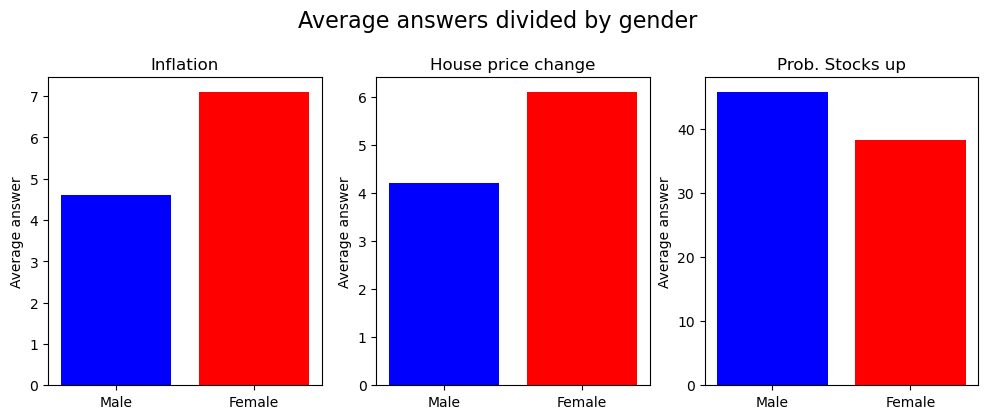

In [ ]:
# plot function for gender 
plot_figure(x=12,y=4,division='gender', dict_function=df_gender_dictionary, categories = genders)


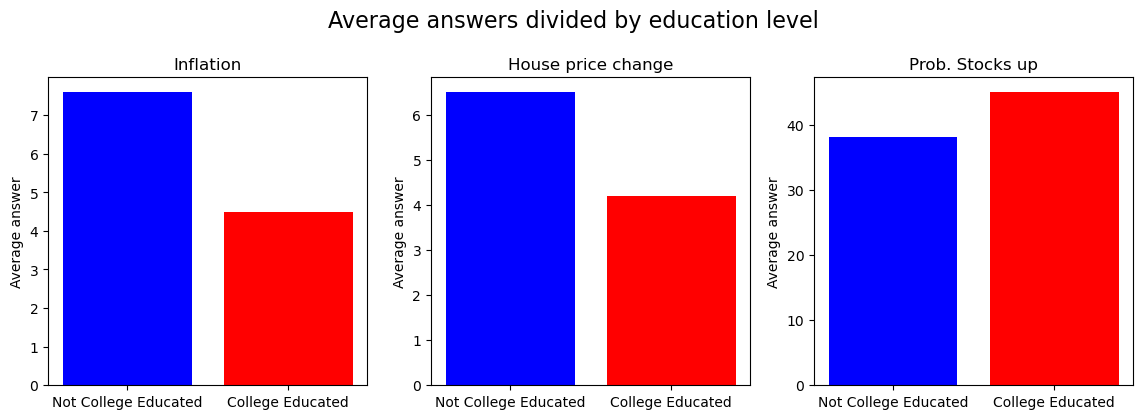

In [ ]:
#plot graph for education level
plot_figure(x=14,y=4, division = 'education level', dict_function = df_college_dictionary, categories = education)

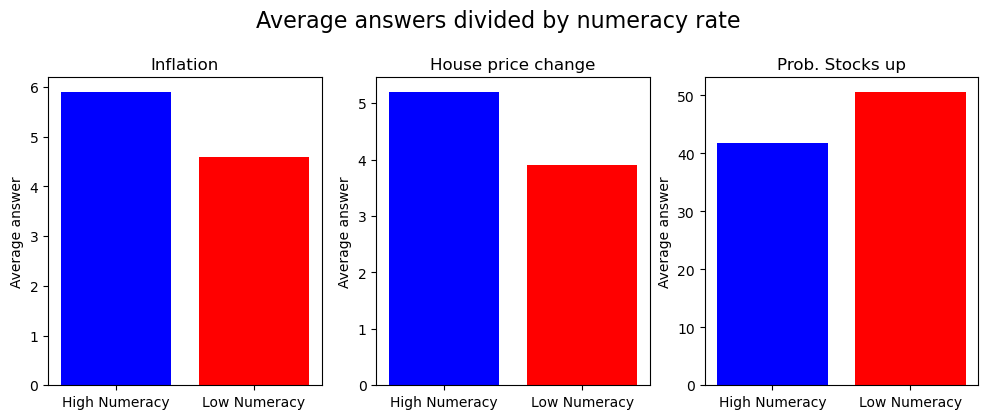

In [ ]:
#plot figure for numeracy
plot_figure(x=12, y=4, division = 'numeracy rate', dict_function = df_numeracy_dictionary, categories = numeracy_rate)

Part 4: Expectations dynamics by group

In this part we use the data to investigate how average expectations evolved over time in the period of 2015-2024, divided by gender, education level and numeracy. 

In [ ]:
# 2015-2024
#set date as index
df4 = df.set_index('date')
#values are not in order, so put them in order of date
df4 = df4.sort_index()
#locate correct years
df4 = df4.loc['2015-01-03': '2024-12-31']
#resample data to monthly
df4monthly = df4.resample('ME')

In [ ]:
#1  collapse data to monthly averages and storing them in dictionaries
# Create dictionary for all values

# gender

df_gender4 = df4.groupby(['female'])
df_gender_month_avg = df_gender4.resample('ME', include_groups=False).mean()
gender4_dictionary = {}
for i in range(len(variables)):
    mon_avgg = df_gender_month_avg[variables[i]]
    gender4_dictionary[i]=mon_avgg
    
# educ
df_college4 = df4.groupby(['college'])
df_college_avg4 = df_college4.resample('ME', include_groups=False).mean()
educ4_dictionary = {}
for i in range(len(variables)):
    mon_avgc = df_college_avg4[variables[i]]
    educ4_dictionary[i]=mon_avgc


#numeracy rates
df_numeracy4 = df4.groupby(['num_lit_high'])
df_numeracy4_avg = df_numeracy4.resample('ME', include_groups=False).mean()
num4_dictionary = {}
for i in range(len(variables)):
    mon_avgn = df_numeracy4_avg[variables[i]]
    num4_dictionary[i]=mon_avgn

In [ ]:
#2 creating figures

#all dates for vertical lines
trump1 = '2016-11-08'
covid = '2020-02-01'
biden = '2020-11-03'
russia = '2022-02-24'
nobel = '2023-10-03'
trump2 = '2024-11-05'
# create a function to plot each vertical line
def vertical_lines(ax):
    ax.axvline(x=trump1, color='green', linestyle='-', linewidth=1, label = 'Trump first presidency')
    ax.axvline(x= covid, color = 'green', linestyle = '--', linewidth = 1, label = 'Covid-19')
    ax.axvline(x= biden, color = 'green', linestyle = ':', linewidth = 1, label = 'Biden president')
    ax.axvline(x= russia, color = 'purple', linestyle = '-', linewidth = 1, label = 'Russian invasion of Ukraine')
    ax.axvline(x= nobel, color = 'purple', linestyle = '--', linewidth = 1, label = 'Jon Fosse won the Nobel Prize')
    ax.axvline(x= trump2, color = 'purple', linestyle = ':', linewidth = 1, label = 'Trump second presidency')

# create a function to plot a figure for each group
def plot_monthly_avg(division, data_dictionary, indicator):
    fig, axes = plt.subplots(1, 3, figsize=(25, 6), sharex=True)
    fig.suptitle(f'Monthly Average by {division}', fontsize=16, y=1)
    #loop to create a panel for each variable
    for i in range(len(variables)):
        mon_avg = data_dictionary[i]
        y=0
        for a in genderint:
            data = mon_avg.loc[a]
            data.plot(ax = axes[i], label = indicator[y], color = colors[y])
            y+=1
            
        axes[i].set_title(figures[i])
        axes[i].set_xlabel('Months')
        axes[i].set_ylabel('Average')
        #plot vertical lines
        vertical_lines(axes[i])
    axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.8))

    plt.tight_layout()
    plt.show()


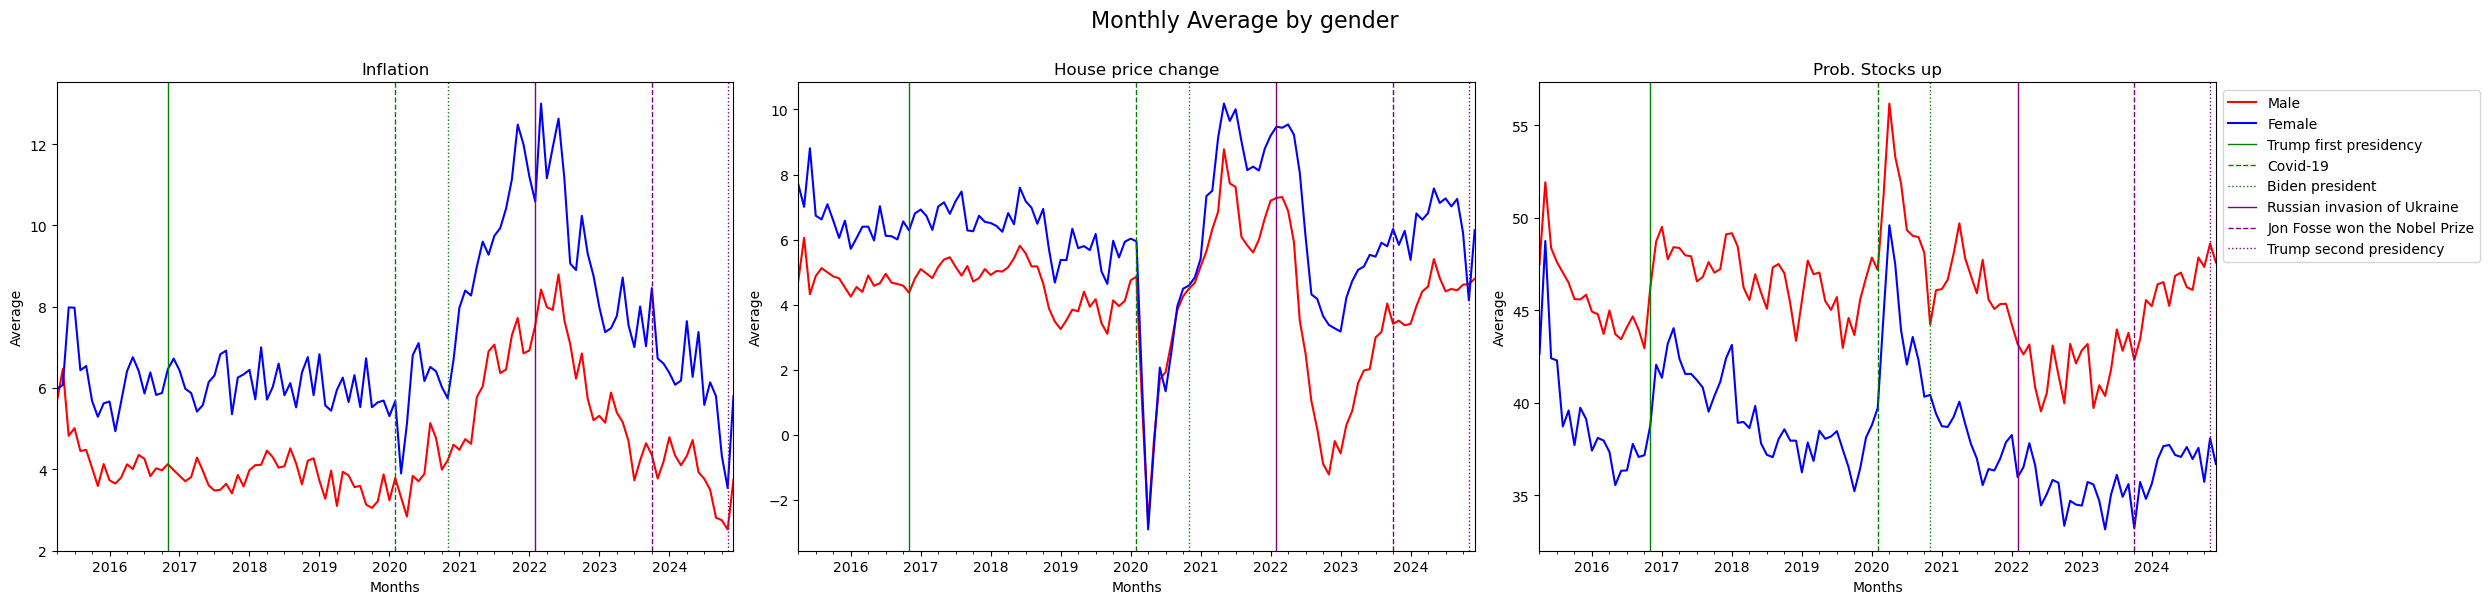

In [ ]:
# plot figure for gender
plot_monthly_avg(division = "gender", data_dictionary = gender4_dictionary, indicator = genders)



 After Trump's  first presidency began, stock price expectations rose, particularly among males, while inflation and house price expectations remained relatively steady. The onset of COVID-19 caused a sharp drop in house price expectations and a decline in inflation expectations for both genders, followed by a gradual recovery. Following the start of Biden’s presidency, both inflation and house price expectations increased significantly across males and females. Stock price expectations fluctuated but generally remained higher for males throughout the period. Later events show smaller or less distinct changes in expectations.







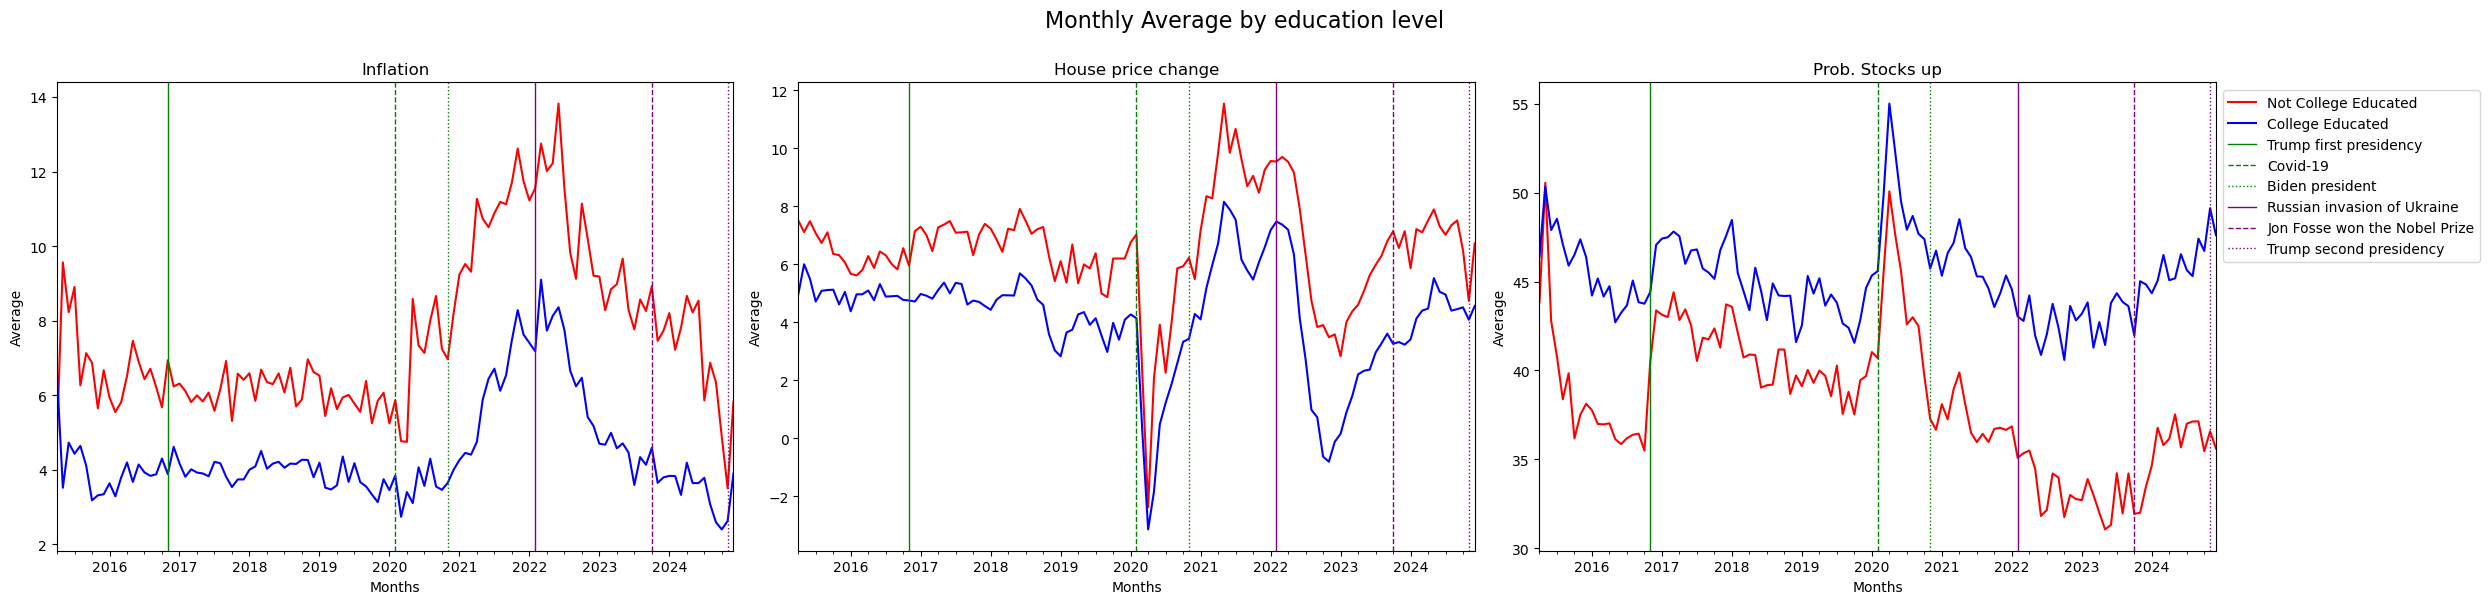

In [ ]:
#plot figure for education level
plot_monthly_avg(division = 'education level', data_dictionary = educ4_dictionary, indicator = education)

After Trump’s first presidency began, stock price expectations rose noticeably, especially for college-educated individuals, while inflation and house price expectations stayed relatively stable. At the start of COVID-19, inflation expectations dropped sharply but then gradually increased again. House price expectations plunged dramatically at the pandemic onset before recovering. Following Biden’s presidency, both inflation and house price expectations increased significantly for both education groups, while stock price expectations showed a moderate rise. The Russian invasion of Ukraine and other later events show smaller or less clear shifts across the variables. 

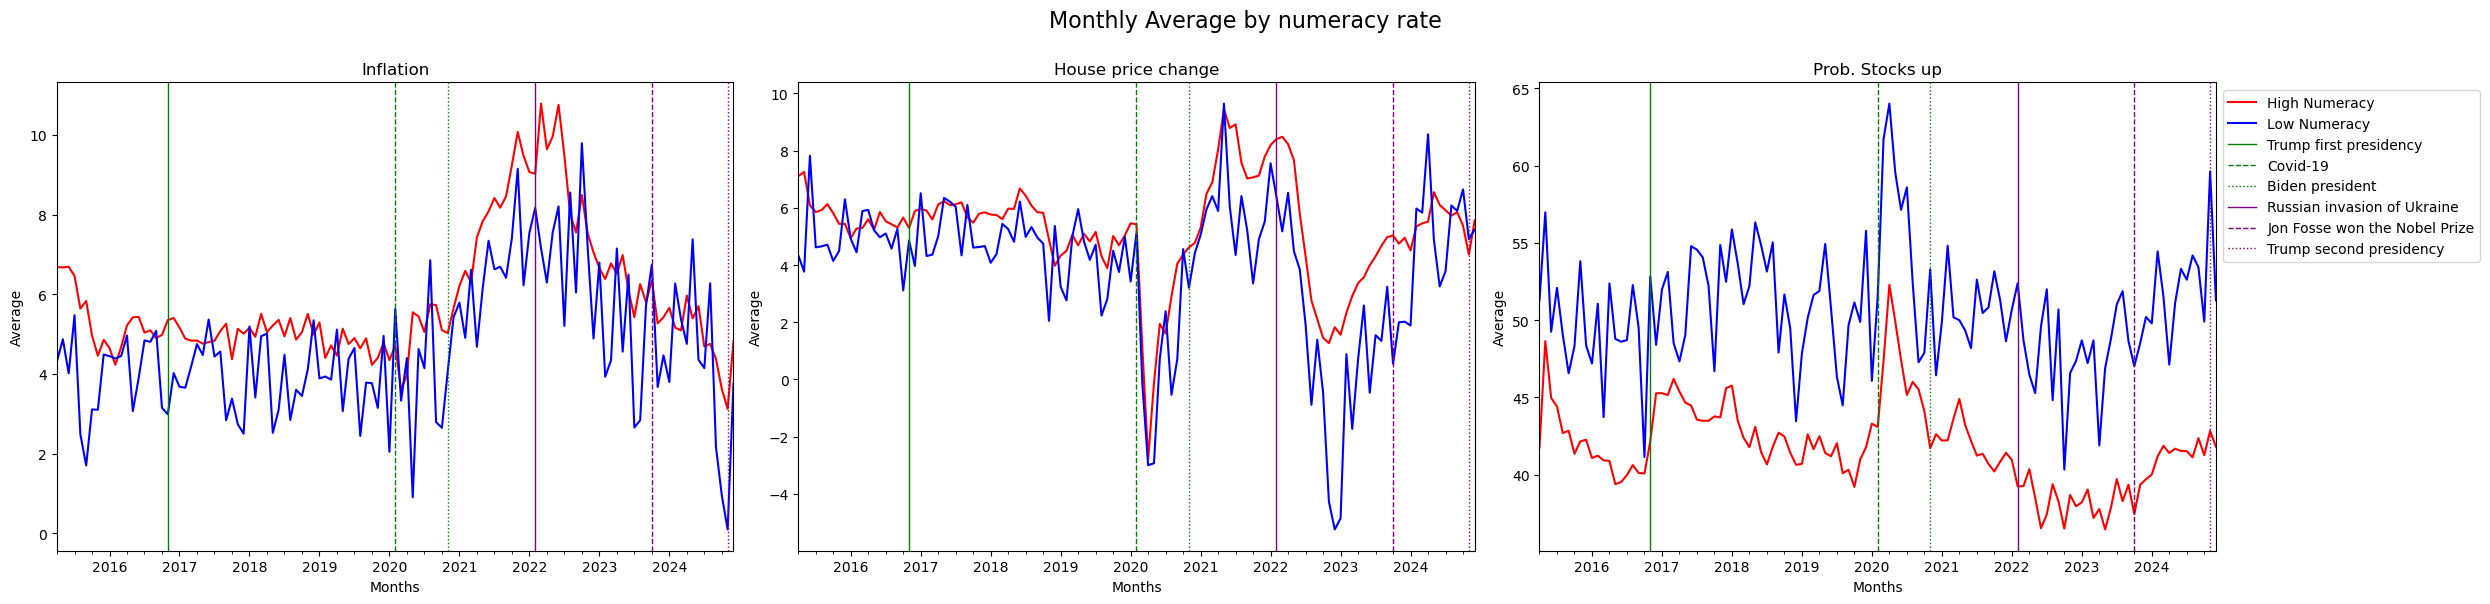

In [ ]:
# plot figure for numeracy rate
plot_monthly_avg(division = 'numeracy rate', data_dictionary = num4_dictionary, indicator = numeracy_rate)

Following Trump’s first presidency, inflation and house price expectations remained relatively steady for both high and low numeracy groups, while stock price expectations showed modest variation. The onset of COVID-19 caused a sharp drop in house price expectations and a decline in inflation expectations for both groups, followed by a rebound. After Biden’s presidency began, inflation and house price expectations rose noticeably, especially for the high numeracy group. Stock price expectations fluctuated but generally remained higher for the low numeracy group throughout.

Part 5: Correlations with past & future realizations